In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Loan.csv')
# df = pd.read_csv('/content/drive/Loan.csv')

Mounted at /content/drive


## Data Visualization

Where "LoanApproved" value of 0 implies rejected and 1 implies approved - for loan application.

In [ ]:
df = pd.read_csv('Loan.csv')

#### Plot for distribution of loan amounts across all applicants. This shows the pattern in the loan amounts requested.

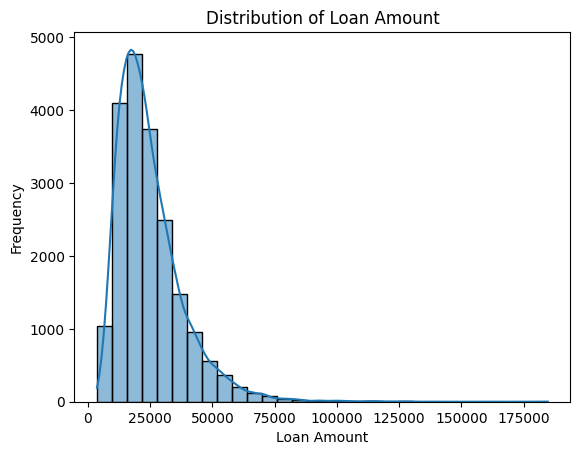

In [ ]:
sns.histplot(df['LoanAmount'], bins = 30, kde = True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

Loan amount distribution is right-skewed. Higher loan amount values can be considered as outliers.

#### Plot on how loan amounts vary by employment status - to understand if employment status affects the loan amount.

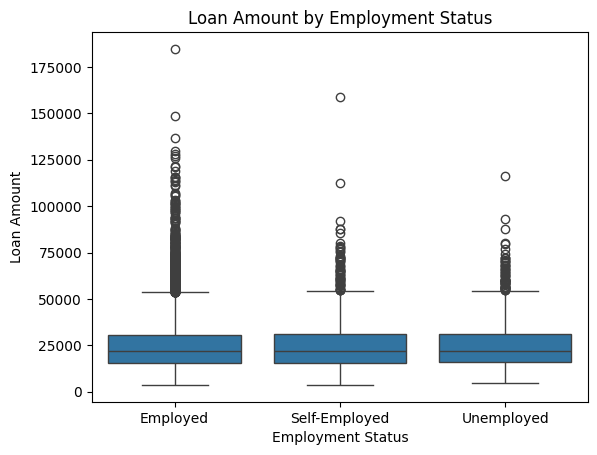

In [ ]:
sns.boxplot(x = 'EmploymentStatus', y = 'LoanAmount', data = df)
plt.title('Loan Amount by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Loan Amount')
plt.show()

Employment status may not be a strong differentiating factor as interquartile range is similar for all employment statuses, but the presence of outliers might still affect the model.


#### Bar plot for average approval rate for each education level.

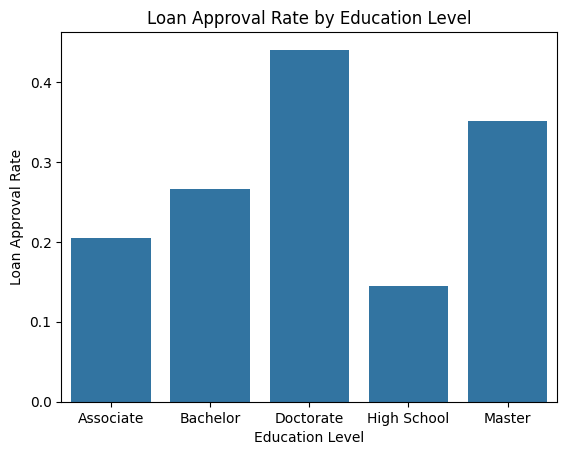

In [ ]:
edu_counts = df.groupby('EducationLevel')['LoanApproved'].mean().reset_index()
sns.barplot(x = 'EducationLevel', y = 'LoanApproved', data = edu_counts)
plt.title('Loan Approval Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Loan Approval Rate')
plt.show()

Education level appears to be a significant factor in predicting loan approval. Higher education levels, particularly Doctorate and Master’s degrees, are associated with higher approval rates.

#### Scatter plot on relationship between credit score and loan amount, points colored based on whether the loan application was approved.

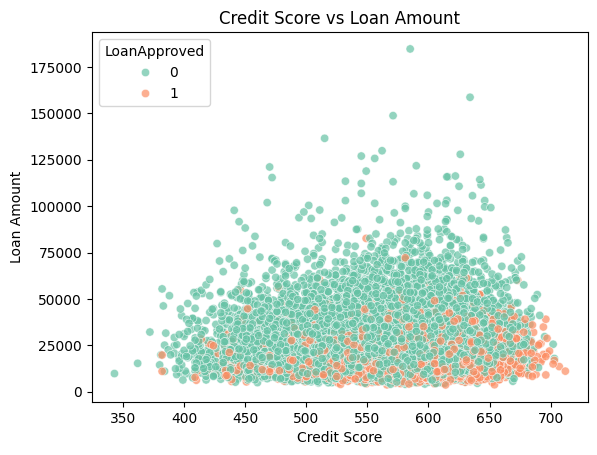

In [ ]:
sns.scatterplot(x = 'CreditScore', y = 'LoanAmount', hue = 'LoanApproved', data = df, palette = 'Set2', alpha = 0.7)
plt.title('Credit Score vs Loan Amount')
plt.xlabel('Credit Score')
plt.ylabel('Loan Amount')
plt.show()

Credit score could likely be a critical factor since higher scores correlate with more approvals. Loan Amount in itself doesn’t seem to be an important factor but it could still interact with features like income and risk score.


#### Boxplot to understand if a higher debt-to-income ratio leads to rejections - plot is to show how debt-to-income ratios differ between approved and rejected loans.

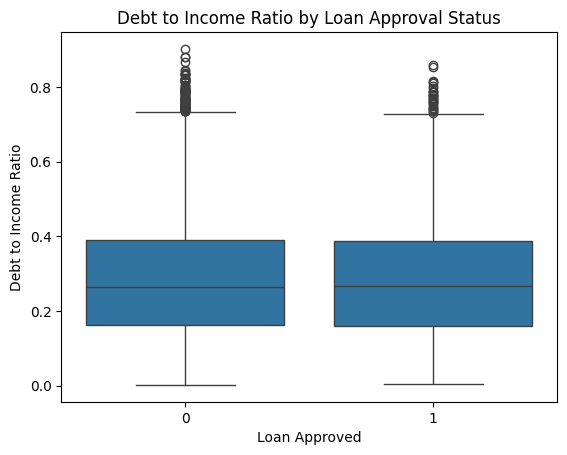

In [ ]:
sns.boxplot(x = 'LoanApproved', y = 'DebtToIncomeRatio', data = df)
plt.title('Debt to Income Ratio by Loan Approval Status')
plt.xlabel('Loan Approved')
plt.ylabel('Debt to Income Ratio')
plt.show()

Debt-to-income ratio doesn’t seem to be a strong factor for loan approval. But it can still contribute to the model when combined with other features. The outliers here might indicate a higher risk for rejection of the loan application.


#### Historgram to capture distribution of age of applicants - analysis to understand what age group highly applies for loans, and if it intuitively makes sense.

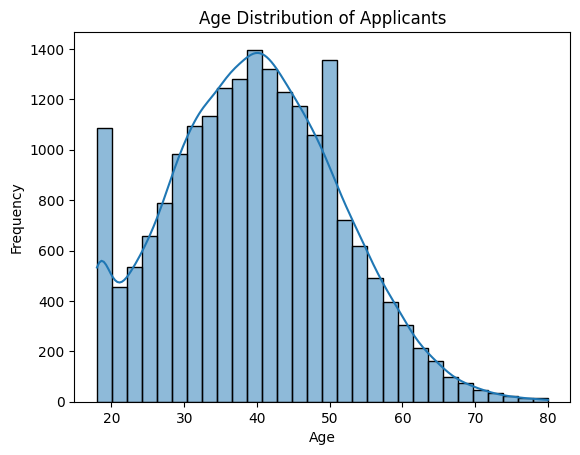

In [ ]:
sns.histplot(df['Age'], bins = 30, kde = True)
plt.title('Age Distribution of Applicants')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Most applicants are aged in the range of 30-50 years. Age group can be further analyzed to see if different age groups have higher approval rate or risk of defaulting.


#### Box plot to understand if marital status affects the loan amount in the loan application.

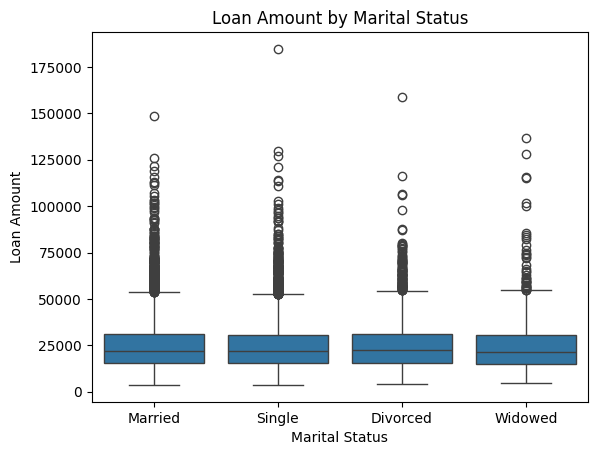

In [ ]:
sns.boxplot(x = 'MaritalStatus', y = 'LoanAmount', data = df)
plt.title('Loan Amount by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Loan Amount')
plt.show()

Marital status alone doesn’t seem to be a significant factor, but it may be useful when combined with other features in the model (presence of a few outliers).


#### Boxplot to check if monthly income affects the status of loan application - being approved or rejected.

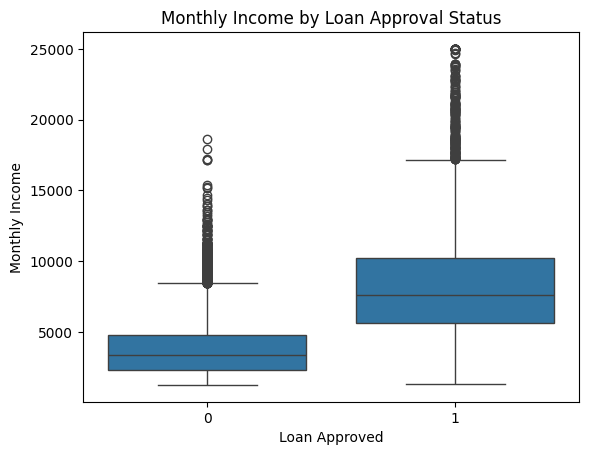

In [ ]:
sns.boxplot(x = 'LoanApproved', y = 'MonthlyIncome', data = df)
plt.title('Monthly Income by Loan Approval Status')
plt.xlabel('Loan Approved')
plt.ylabel('Monthly Income')
plt.show()

Monthly income seems to be a strong predictor for loan approval. It makes sense intuitively that people with a higher monthly income might have a lower risk of defaulting, hence the higher chances of having their loan application approved.


#### Boxplot to analyze how risk score affects the loan approval status.

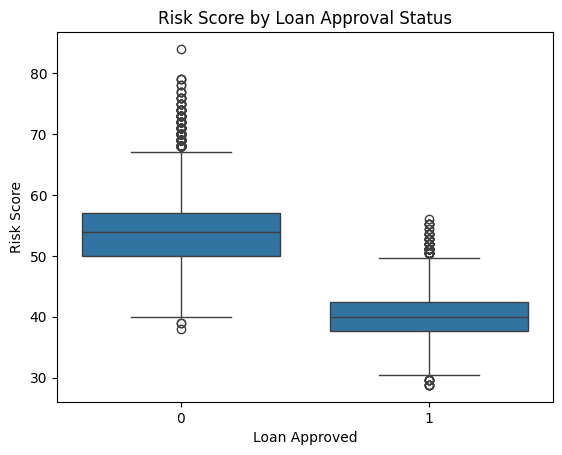

In [ ]:
sns.boxplot(x = 'LoanApproved', y = 'RiskScore', data = df)
plt.title('Risk Score by Loan Approval Status')
plt.xlabel('Loan Approved')
plt.ylabel('Risk Score')
plt.show()

Risk score is clearly a strong feature for loan approval status. Low risk scores strongly correlate with approvals for the loan applications, which intuitively makes sense, as explained above for the “Monthly income by Loan Approval Status” graph.


## Data Preprocessing

In [ ]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

(None, (20000, 36))

In [ ]:
# df = pd.read_csv('Loan.csv')

# Check if there are missing values
df.isnull().sum()

,0
ApplicationDate,0
Age,0
AnnualIncome,0
CreditScore,0
EmploymentStatus,0
EducationLevel,0
Experience,0
LoanAmount,0
LoanDuration,0
MaritalStatus,0


In [ ]:
# Drop columns that are irrelevant
df.drop(columns=['ApplicationDate'], inplace=True)
df.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,45,39948,617,Employed,Master,22,13152,48,Married,2,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,38,39709,628,Employed,Associate,15,26045,48,Single,1,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,58,69084,545,Employed,High School,34,37898,96,Single,1,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,37,103264,594,Employed,Associate,17,9184,36,Married,1,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


## Classification model
### Data split / preprocessing

In [ ]:
# Split dataset into features and target
class_X = df.drop(columns = ['LoanApproved'])
class_y = df['LoanApproved']

In [ ]:
# Encode the categorical features
ordinal_features = ['EducationLevel']
cat_features = ['MaritalStatus', 'EmploymentStatus','HomeOwnershipStatus', 'LoanPurpose']
num_features = ['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount',
                      'LoanDuration', 'MonthlyDebtPayments', 'CreditCardUtilizationRate',
                      'NumberOfOpenCreditLines', 'DebtToIncomeRatio', 'MonthlyIncome',
                      'NetWorth', 'TotalDebtToIncomeRatio', 'RiskScore']

ordinal_encoder = OrdinalEncoder()
class_X[ordinal_features] = ordinal_encoder.fit_transform(df[ordinal_features])

binary_encoder = OrdinalEncoder()
class_X[cat_features] = binary_encoder.fit_transform(df[cat_features])

class_X.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
0,45,39948,617,0.0,4.0,22,13152,48,1.0,2,...,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,49.0
1,38,39709,628,0.0,0.0,15,26045,48,2.0,1,...,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,52.0
2,47,40724,570,0.0,1.0,26,17627,36,1.0,2,...,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,52.0
3,58,69084,545,0.0,3.0,34,37898,96,2.0,1,...,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,54.0
4,37,103264,594,0.0,0.0,17,9184,36,1.0,1,...,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,36.0


Highly correlated pair: (Age, Experience) with correlation value: 0.98
Highly correlated pair: (AnnualIncome, MonthlyIncome) with correlation value: 0.99
Highly correlated pair: (TotalAssets, NetWorth) with correlation value: 0.98


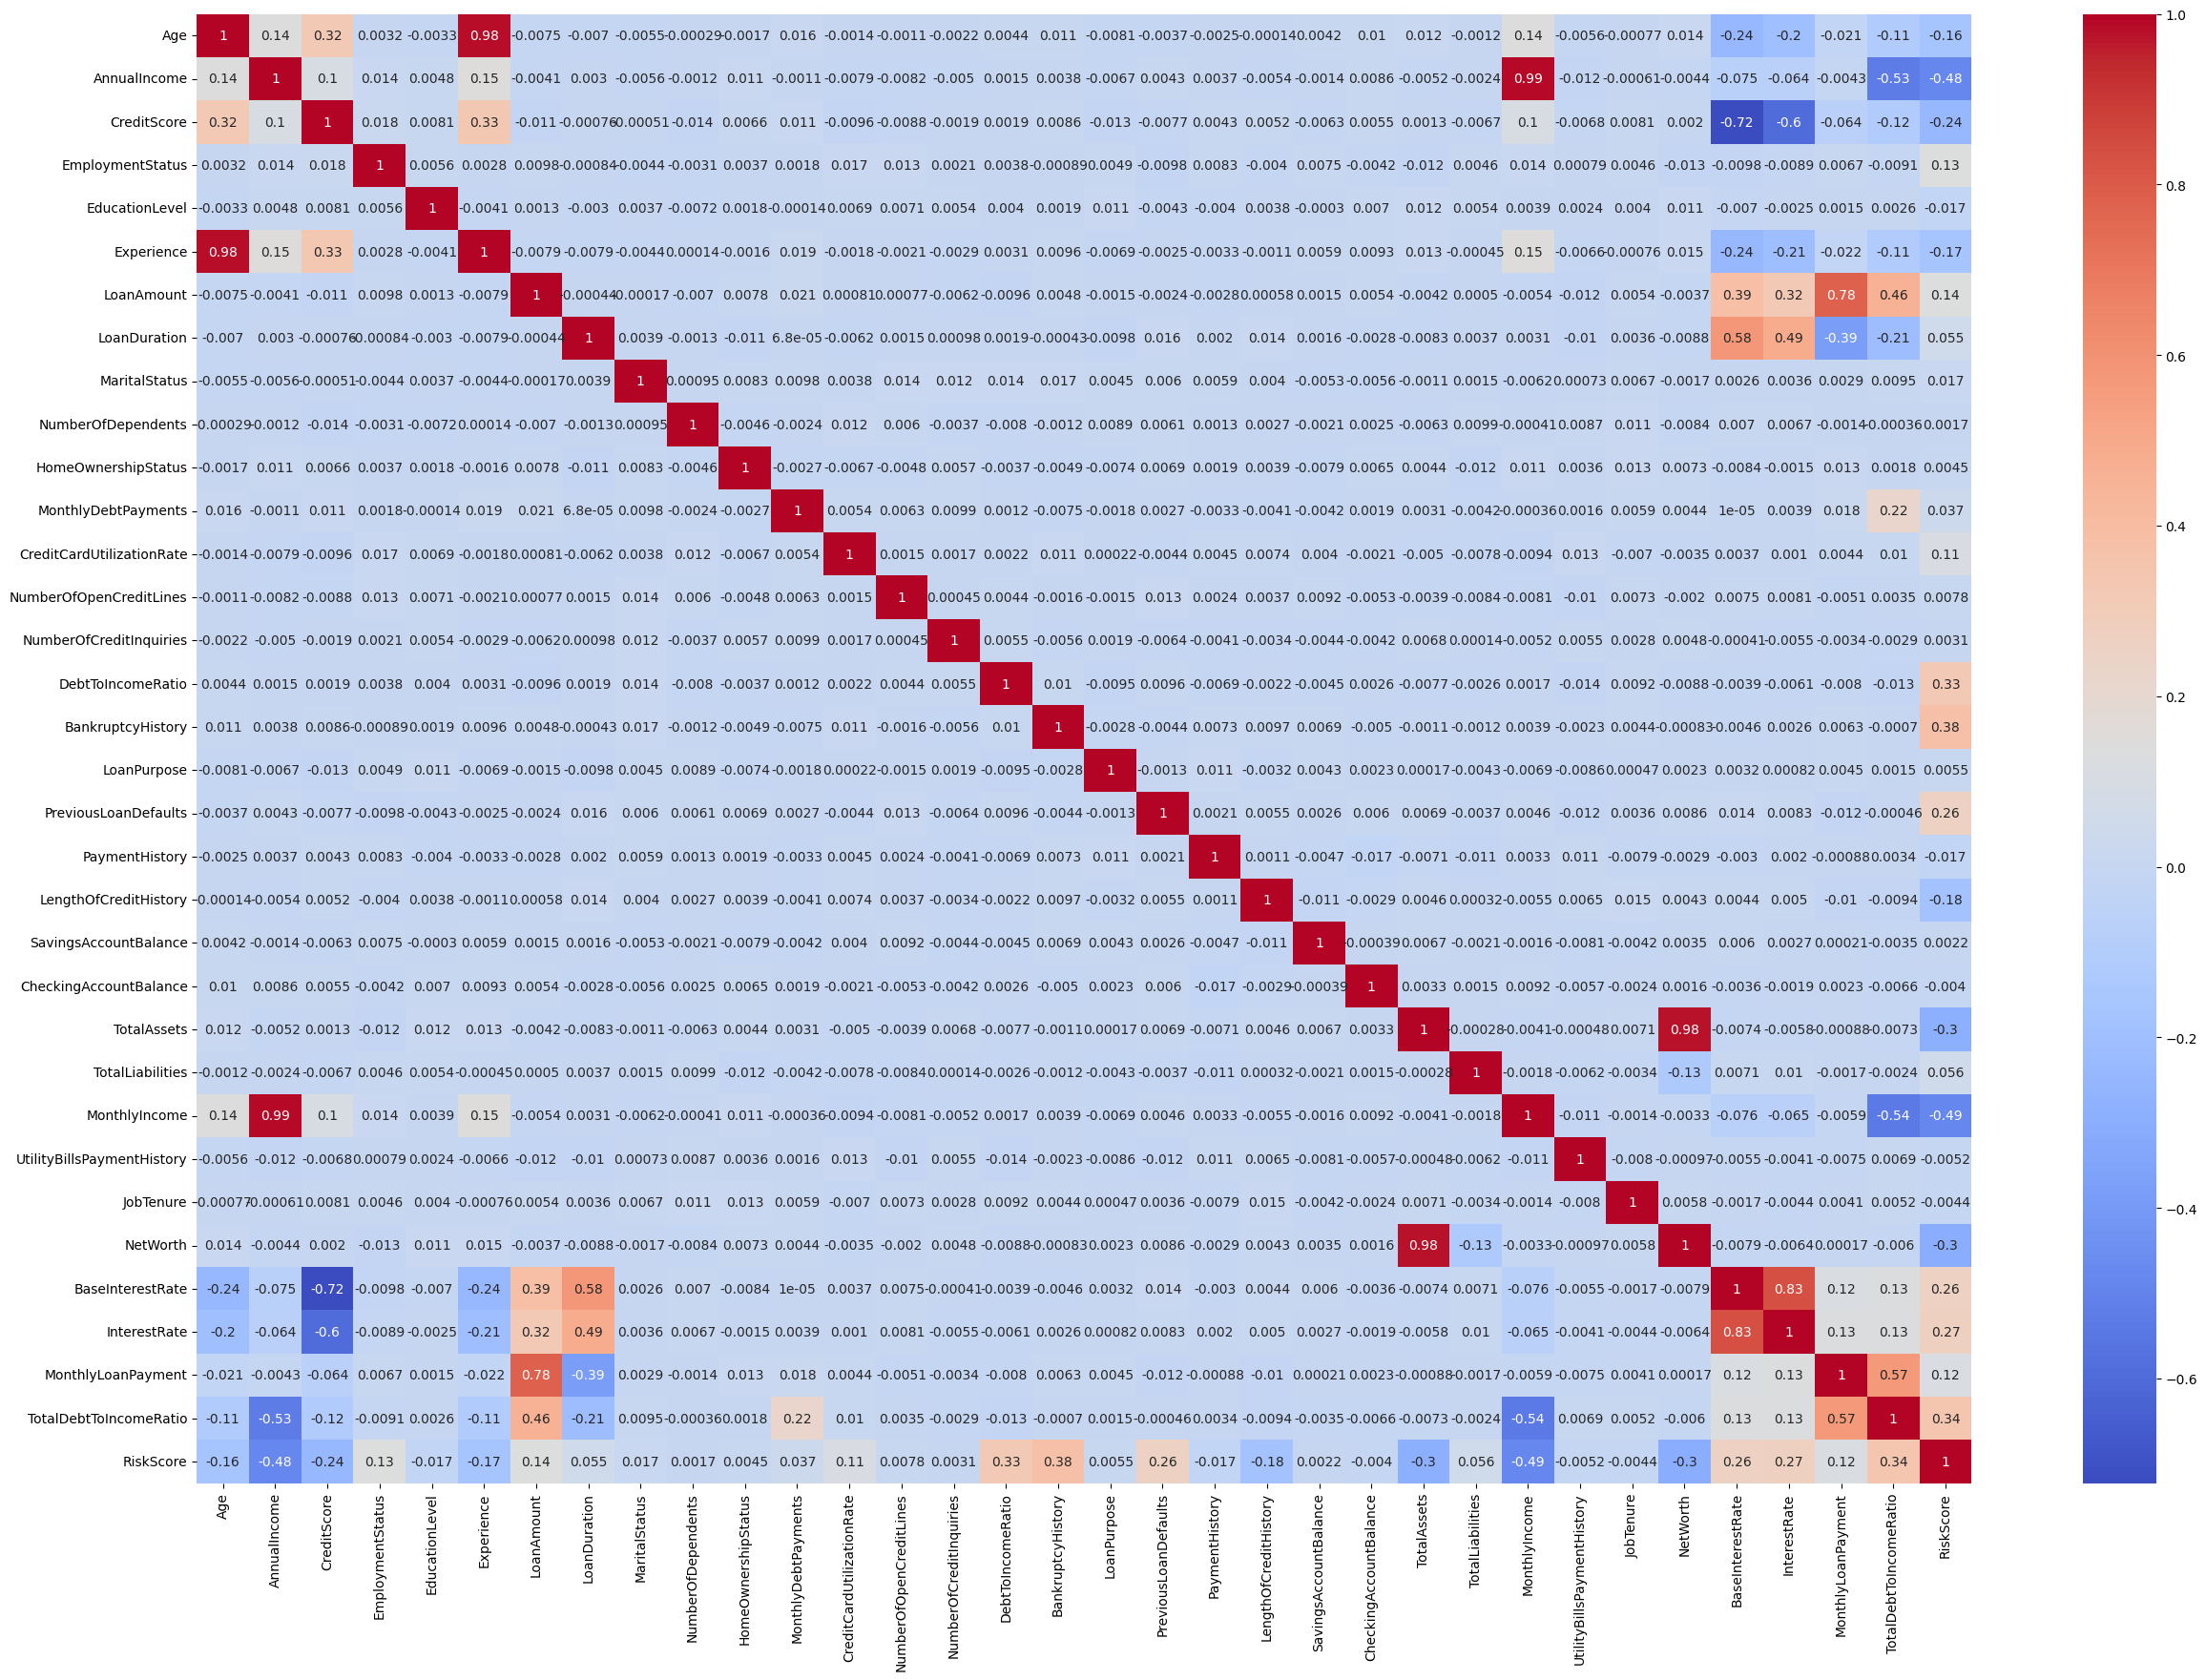

In [ ]:
# Plot the correlation matrix
plt.figure(figsize=(30, 20))
class_corr = class_X.corr()
sns.heatmap(class_corr, annot=True, cmap='coolwarm')

# Identify highly correlated features with correlation above 0.9
high_corr_pairs = class_corr.where(np.triu(np.ones(class_corr.shape), k=1).astype(bool))
high_corr_pairs = high_corr_pairs[abs(high_corr_pairs) >= 0.9].stack()

for (feature1, feature2), corr_value in high_corr_pairs.items():
    print(f"Highly correlated pair: ({feature1}, {feature2}) with correlation value: {corr_value:.2f}")

In [ ]:
# drop one from each highly correlated pairs
class_X = class_X.drop(columns = ['MonthlyIncome', 'NetWorth', 'Experience'])

In [ ]:
# Development Test split
class_X_train, class_X_test, class_y_train, class_y_test = train_test_split(class_X, class_y, test_size=0.2,random_state=42, stratify = class_y)

In [ ]:
# Scale numerical columns
scaler = StandardScaler()
class_X_train = scaler.fit_transform(class_X_train)
class_X_test = scaler.transform(class_X_test)

# Adding a column of ones to include the bias term
class_X_train = np.hstack([np.ones((class_X_train.shape[0], 1)), class_X_train])
class_X_test = np.hstack([np.ones((class_X_test.shape[0], 1)), class_X_test])

# Shape of train and test set
print('train shape: ', class_X_train.shape, class_y_train.shape)
print('test shape: ', class_X_test.shape, class_y_test.shape)

train shape:  (16000, 32) (16000,)
test shape:  (4000, 32) (4000,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from xgboost import XGBClassifier
import time
import warnings

#### Logistic Regression

In [ ]:
# account for imbalanced class
log_reg = LogisticRegression(class_weight='balanced')
skf = StratifiedKFold(n_splits=5)
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100,200,300,400]
}

grid_search = GridSearchCV(log_reg, param_dist, cv=skf, scoring='f1')
grid_search.fit(class_X_train, class_y_train)
best_log_reg = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)

Best parameters: {'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}
Best F1-score: 0.9988237849980491


In [ ]:
# account for imbalanced class
best_y_pred_log_reg = best_log_reg.predict(class_X_test)
print(classification_report(class_y_test, best_y_pred_log_reg))
print(accuracy_score(class_y_test, best_y_pred_log_reg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3044
           1       1.00      1.00      1.00       956

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

0.99975


#### SVMs

##### Primal
Fewer features than samples

In [ ]:
num_samples, num_features = class_X.shape
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

Number of samples: 20000
Number of features: 31


In [ ]:
linsvc = LinearSVC(class_weight='balanced', random_state=42)
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'max_iter': [100,200,300,400]
}

grid_search = GridSearchCV(linsvc, param_dist, scoring='f1', cv=5)
grid_search.fit(class_X_train, class_y_train)

best_linsvc = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)

best_y_pred_linsvc = best_linsvc.predict(class_X_test)
print(classification_report(class_y_test, best_y_pred_linsvc))
print(accuracy_score(class_y_test, best_y_pred_linsvc))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best parameters: {'C': 1, 'max_iter': 100}
Best F1-score: 0.9986936623757335
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3044
           1       1.00      1.00      1.00       956

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

0.99975


### Decision Tree

In [ ]:
from sklearn.tree import plot_tree

# fit decision tree until pure leaves

# remove bias term for trees
dt_X_train = class_X_train[:, 1:]
dt_X_test = class_X_test[:, 1:]

dt = DecisionTreeClassifier(class_weight='balanced', max_depth=None, random_state=42)
dt.fit(dt_X_train, class_y_train)\

y_pred_dt_train = dt.predict(dt_X_train)
y_pred_dt_test = dt.predict(dt_X_test)

print("training:\n" + str(classification_report(class_y_train, y_pred_dt_train)))
print("\ntesting:\n" + str(classification_report(class_y_test, y_pred_dt_test)))
accuracy_score(class_y_test, y_pred_dt_test)


training:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12176
           1       1.00      1.00      1.00      3824

    accuracy                           1.00     16000
   macro avg       1.00      1.00      1.00     16000
weighted avg       1.00      1.00      1.00     16000


testing:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3044
           1       0.98      0.98      0.98       956

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



0.98925

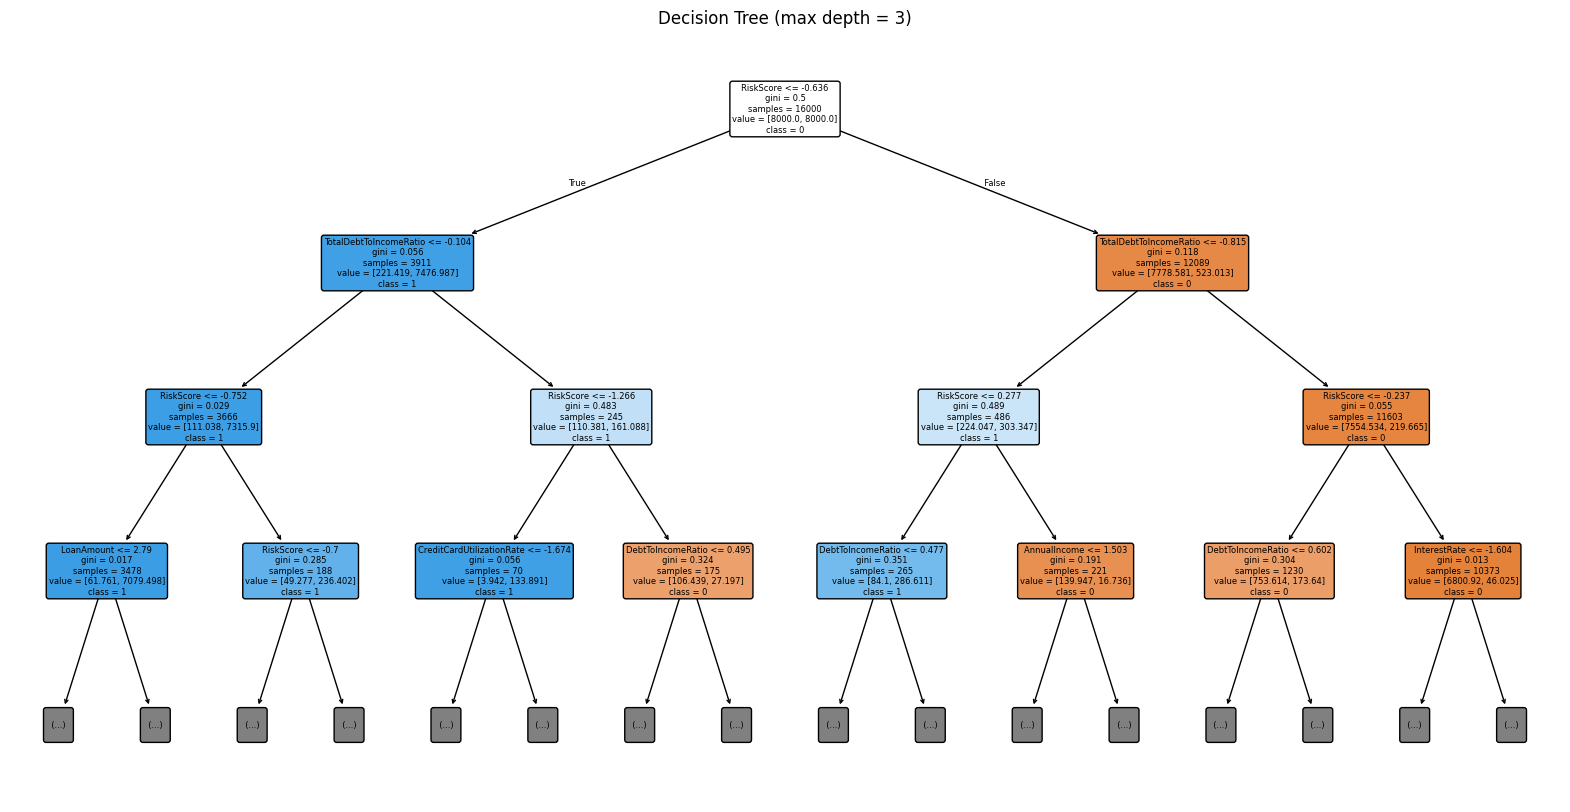

In [ ]:
# visualize
max_depth = 3
plt.figure(figsize=(20, 10))
plot_tree(dt,
          filled=True,
          feature_names=class_X.columns,
          class_names=['0', '1'],
          max_depth=max_depth,
          rounded=True,
          fontsize=6)
plt.title(f'Decision Tree (max depth = {max_depth})')
plt.show()

In [ ]:
# pruning -- does not seem to accomplish much
path = dt.cost_complexity_pruning_path(dt_X_train, class_y_train)
ccp_alphas =path.ccp_alphas

dt_train_scores = []
dt_test_scores = []

for c in ccp_alphas:
    dt = DecisionTreeClassifier(class_weight='balanced', random_state=42, ccp_alpha=c)
    dt.fit(dt_X_train, class_y_train)
    y_train_pruned = dt.predict(dt_X_train)
    y_test_pruned = dt.predict(dt_X_test)
    dt_train_scores.append(accuracy_score(class_y_train, y_train_pruned))
    dt_test_scores.append(accuracy_score(class_y_test, y_test_pruned))

best_alpha = ccp_alphas[np.argmax(dt_test_scores)]
dt_best = DecisionTreeClassifier(class_weight='balanced', random_state=42, ccp_alpha=best_alpha)
dt_best.fit(dt_X_train, class_y_train)

print("training:\n" + str(classification_report(class_y_train, dt_best.predict(dt_X_train))))
print("\ntesting:\n" + str(classification_report(class_y_test, dt_best.predict(dt_X_test))))
accuracy_score(class_y_test, y_pred_dt_test)

training:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12176
           1       0.99      1.00      0.99      3824

    accuracy                           1.00     16000
   macro avg       0.99      1.00      0.99     16000
weighted avg       1.00      1.00      1.00     16000


testing:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3044
           1       0.98      0.98      0.98       956

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



0.98925

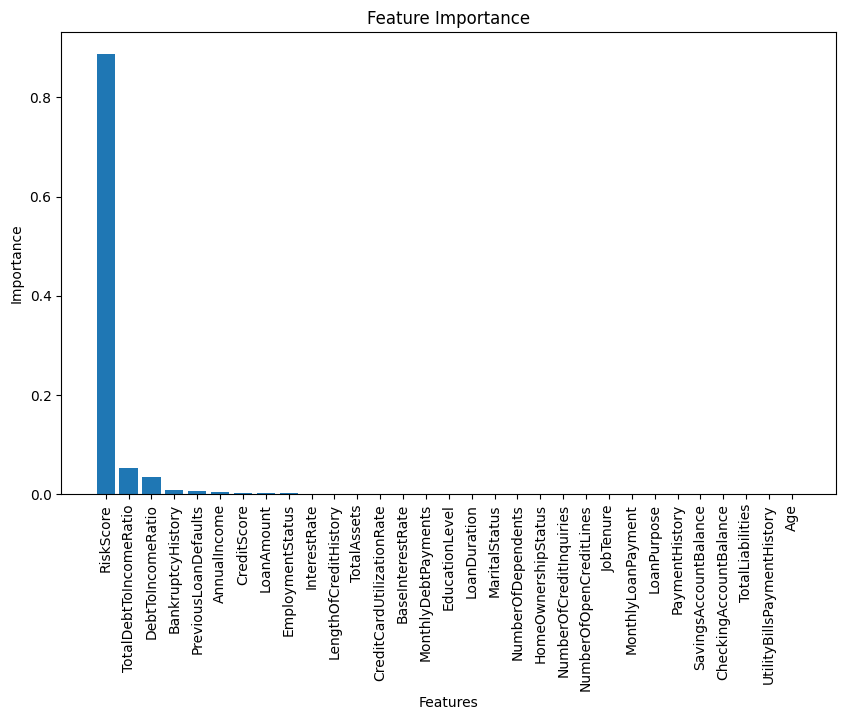

In [ ]:
# feature importance
feature_importances = dt_best.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(dt_best.n_features_in_), feature_importances[sorted_indices])
plt.xticks(range(dt_best.n_features_in_), class_X.columns[sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

### Random Forests

In [ ]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(dt_X_train, class_y_train)

y_pred_rf_train = rf.predict(dt_X_train)
y_pred_rf_test = rf.predict(dt_X_test)

print("training:\n" + str(classification_report(class_y_train, y_pred_rf_train)))
print("\ntesting:\n" + str(classification_report(class_y_test, y_pred_rf_test)))

training:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12176
           1       1.00      1.00      1.00      3824

    accuracy                           1.00     16000
   macro avg       1.00      1.00      1.00     16000
weighted avg       1.00      1.00      1.00     16000


testing:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3044
           1       0.98      0.98      0.98       956

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



In [ ]:
# hyperparameters with OOB

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, 30]
}

rf_grid = RandomForestClassifier(class_weight='balanced', random_state=42, oob_score=True)
grid_search = GridSearchCV(rf_grid, param_grid, cv=5, scoring='f1')
grid_search.fit(dt_X_train, class_y_train)

best_rf = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)

print("training:\n" + str(classification_report(class_y_train, best_rf.predict(dt_X_train))))
print("\ntesting:\n" + str(classification_report(class_y_test, best_rf.predict(dt_X_test))))
accuracy_score(class_y_test, best_rf.predict(dt_X_test))

Best parameters: {'max_depth': 10, 'n_estimators': 200}
Best F1-score: 0.9778025070097381
training:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12176
           1       0.99      1.00      1.00      3824

    accuracy                           1.00     16000
   macro avg       1.00      1.00      1.00     16000
weighted avg       1.00      1.00      1.00     16000


testing:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3044
           1       0.97      0.98      0.98       956

    accuracy                           0.99      4000
   macro avg       0.98      0.99      0.98      4000
weighted avg       0.99      0.99      0.99      4000



0.98875

### Gradient Boosting

In [ ]:
warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', class_weight='balanced', random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2]
}

start = time.time()
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='f1')
grid_search.fit(dt_X_train, class_y_train)
end = time.time()
time_taken = end - start
print(f"Time taken: {time_taken} seconds")
best_xgb = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)
print("training:\n" + str(classification_report(class_y_train, best_xgb.predict(dt_X_train))))
print("\ntesting:\n" + str(classification_report(class_y_test, best_xgb.predict(dt_X_test))))
accuracy_score(class_y_test, best_xgb.predict(dt_X_test))


Time taken: 152.73059487342834 seconds
Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Best F1-score: 0.9973845858353835
training:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12176
           1       1.00      1.00      1.00      3824

    accuracy                           1.00     16000
   macro avg       1.00      1.00      1.00     16000
weighted avg       1.00      1.00      1.00     16000


testing:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3044
           1       1.00      1.00      1.00       956

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



0.99825

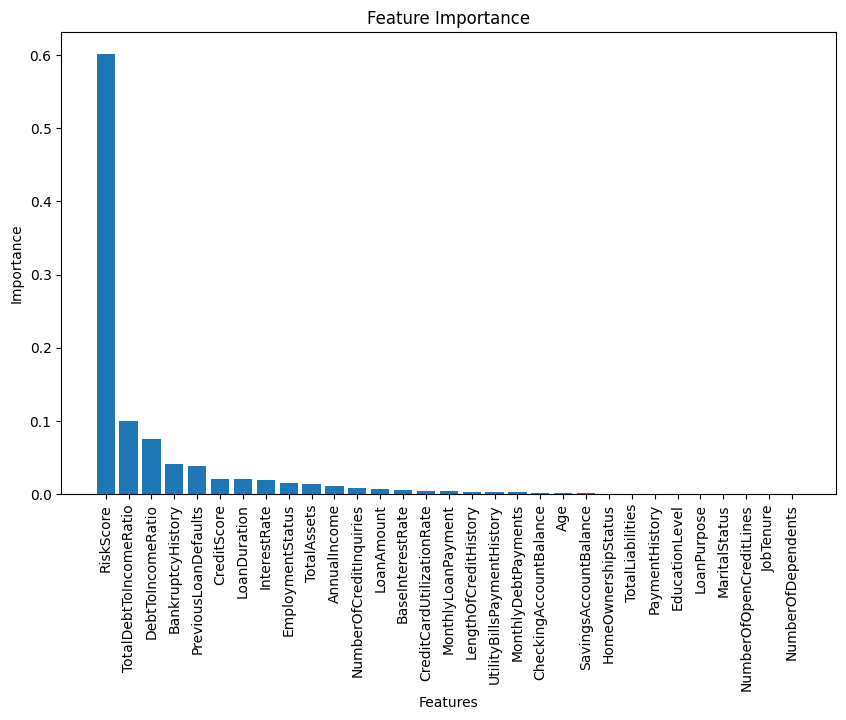

In [ ]:
# feature importance
feature_importances = best_xgb.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(best_xgb.n_features_in_), feature_importances[sorted_indices])
plt.xticks(range(best_xgb.n_features_in_), class_X.columns[sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

## Regression model
### Data split / preprocessing

In [ ]:
# Split dataset into features and target
reg_X = df.drop(columns=["RiskScore"])
reg_y = df["RiskScore"]

In [ ]:
# Encode the categorical features
ordinal_ft = ['EducationLevel']
cat_ft = ['MaritalStatus', 'EmploymentStatus','HomeOwnershipStatus', 'LoanPurpose', 'LoanApproved']
num_ft = ['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount',
                      'LoanDuration', 'MonthlyDebtPayments', 'CreditCardUtilizationRate',
                      'NumberOfOpenCreditLines', 'DebtToIncomeRatio', 'MonthlyIncome',
                      'NetWorth', 'TotalDebtToIncomeRatio']

ordinal_encoder = OrdinalEncoder()
reg_X[ordinal_ft] = ordinal_encoder.fit_transform(df[ordinal_ft])

binary_encoder = OrdinalEncoder()
reg_X[cat_ft] = binary_encoder.fit_transform(df[cat_ft])

reg_X.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,45,39948,617,0.0,4.0,22,13152,48,1.0,2,...,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0.0
1,38,39709,628,0.0,0.0,15,26045,48,2.0,1,...,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0.0
2,47,40724,570,0.0,1.0,26,17627,36,1.0,2,...,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0.0
3,58,69084,545,0.0,3.0,34,37898,96,2.0,1,...,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0.0
4,37,103264,594,0.0,0.0,17,9184,36,1.0,1,...,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1.0


In [ ]:
# drop one from each highly correlated pairs (same pairs from correlation matrix above)
reg_X = reg_X.drop(columns = ['MonthlyIncome', 'NetWorth', 'Experience'])

In [ ]:
# Train Test split
reg_X_train, reg_X_test, reg_y_train, reg_y_test = train_test_split(reg_X, reg_y, test_size=0.2, random_state=42)

In [ ]:
# Scale numerical columns
scaler = StandardScaler()
reg_X_train = scaler.fit_transform(reg_X_train)
reg_X_test = scaler.transform(reg_X_test)

# Adding a column of ones to include the bias term
reg_X_train = np.hstack([np.ones((reg_X_train.shape[0], 1)), reg_X_train])
reg_X_test = np.hstack([np.ones((reg_X_test.shape[0], 1)), reg_X_test])

# Shape of train and test set
print('train shape: ', reg_X_train.shape, reg_y_train.shape)
print('test shape: ', reg_X_test.shape, reg_y_test.shape)

train shape:  (16000, 32) (16000,)
test shape:  (4000, 32) (4000,)


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
! pip install catboost
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.5 MB/s eta 0:00:00


Lasso Regression

In [ ]:
# Define hyperparameters
param_dist = {
    'alpha': np.logspace(-2, -1, 20),
    'max_iter': [1000, 2000, 3000, 5000],
    'tol': [1e-4, 1e-3, 1e-2]  # Range of tolerance values
}

# Initialize the Lasso model
lasso = Lasso(random_state=42)

random_search = RandomizedSearchCV(lasso, param_distributions=param_dist, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(reg_X_train, reg_y_train)
print(f'Best Parameters: {random_search.best_params_}')
# Refit the model using the best parameters
lasso_best = random_search.best_estimator_
lasso_best.fit(reg_X_train, reg_y_train)

train_score = lasso_best.score(reg_X_train, reg_y_train)
test_score = lasso_best.score(reg_X_test, reg_y_test)
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')


Best Parameters: {'tol': 0.0001, 'max_iter': 3000, 'alpha': 0.01}
Train Score: 0.937100300260205
Test Score: 0.9343474261591965


Gradient Boosting Regression

In [ ]:
# Define hyperparameters
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

# Initialize the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(random_state=42)

# Perform RandomizedSearchCV
random_search_gbr = RandomizedSearchCV(gbr, param_distributions=param_dist, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search_gbr.fit(reg_X_train, reg_y_train)

print(f'Best Parameters for Gradient Boosting: {random_search_gbr.best_params_}')
gbr_best = random_search_gbr.best_estimator_
# Fit the best Gradient Boosting model
gbr_best.fit(reg_X_train, reg_y_train)

train_score_gbr = gbr_best.score(reg_X_train, reg_y_train)
test_score_gbr = gbr_best.score(reg_X_test, reg_y_test)
print(f'Train Score: {train_score_gbr}')
print(f'Test Score: {test_score_gbr}')


Best Parameters for Gradient Boosting: {'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 4, 'learning_rate': 0.2}
Train Score: 0.9978998210887633
Test Score: 0.9966665371336101


Random Forest Regression

In [ ]:
# Define hyperparameters
param_dist = {
    'n_estimators': np.arange(50, 200, 50),
    'max_depth': np.arange(5, 20, 5),
}

# Initialize the RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)

random_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=9, cv=5, random_state=42, n_jobs=-1)
random_search_rf.fit(reg_X_train, reg_y_train)

# Get the best model and its hyperparameters
best_rf_model = random_search_rf.best_estimator_

train_score_rf = best_rf_model.score(reg_X_train, reg_y_train)
test_score_rf = best_rf_model.score(reg_X_test, reg_y_test)
print(f'Train Score: {train_score_rf}')
print(f'Test Score: {test_score_rf}')

Train Score: 0.9962614923114792
Test Score: 0.9813669154128418


Random Forest Regression with OOB

In [ ]:
# Define the parameters
param_dist = {
    'n_estimators': np.arange(50, 200, 50),
    'max_depth': np.arange(5, 20, 5),
}

# Initialize the RandomForestRegressor model with OOB
rf_oob = RandomForestRegressor(random_state=42, oob_score=True)

random_search_rf_oob = RandomizedSearchCV(rf_oob, param_distributions=param_dist, n_iter=9, cv=5, random_state=42, n_jobs=-1)
random_search_rf_oob.fit(reg_X_train, reg_y_train)

# Get the best model and its hyperparameters
best_rf_oob_model = random_search_rf_oob.best_estimator_


train_score_rf_oob = best_rf_oob_model.score(reg_X_train, reg_y_train)
test_score_rf_oob = best_rf_oob_model.score(reg_X_test, reg_y_test)
print(f'Train Score: {train_score_rf_oob}')
print(f'Test Score: {test_score_rf_oob}')
print(f'OOB Score: {best_rf_oob_model.oob_score_}')


Train Score: 0.9962614923114792
Test Score: 0.9813669154128418
OOB Score: 0.9795322980083391


XGBoost Regression

In [ ]:
# Define the hyperparameters
param_dist = {
    'n_estimators': np.arange(50, 300, 50),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
}

# Initialize the XGBoost regressor
xg_reg = XGBRegressor(random_state=42)

# Perform RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(
    estimator=xg_reg,
    param_distributions=param_dist,
    n_iter=100,
    scoring='neg_mean_squared_error',
    cv=5,
    random_state=42,
    n_jobs=-1
)

random_search.fit(reg_X_train, reg_y_train)
best_xg_reg = random_search.best_estimator_

train_score = best_xg_reg.score(reg_X_train, reg_y_train)
test_score = best_xg_reg.score(reg_X_test, reg_y_test)
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')


LightGBM Regression


In [ ]:
# Define and train the LightGBM model
lgbm = lgb.LGBMRegressor(
    random_state=42,
    n_estimators=100,
    learning_rate=0.05,
    num_leaves=31,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    force_col_wise=True
)

lgbm.fit(reg_X_train, reg_y_train)

train_score = lgbm.score(reg_X_train, reg_y_train)
test_score = lgbm.score(reg_X_test, reg_y_test)
print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")


CatBoost Regression

In [ ]:
# Define the hyperparameters
param_dist = {
    'iterations': [200, 300, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'border_count': [32, 50, 100]
}

# Define the CatBoostRegressor model
catboost_model = CatBoostRegressor(random_state=42, verbose=0)

# Perform RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(
    catboost_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=3,
    random_state=42,
    n_jobs=-1
)

random_search.fit(reg_X_train, reg_y_train)

print(f"Best Parameters: {random_search.best_params_}")

best_catboost_model = random_search.best_estimator_

train_score = best_catboost_model.score(reg_X_train, reg_y_train)
test_score = best_catboost_model.score(reg_X_test, reg_y_test)
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')
